Importing required Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:

df = pd.read_csv(r"C:\Users\Suhana\OneDrive\Desktop\Phonepe-financial-analyzer-\data\sample_transaction.csv",sep="\t" )

In [76]:
df.head()
#df.dtypes

,Date,Time,Transaction_ID,Type,Mode,Merchant,Category,Debit,Credit,Balance,Status
0,01-08-2025,9:00 AM,TXN2000,Salary Credit,Bank,ABC Pvt Ltd,Salary,0,45000,45000,Success
1,02-08-2025,10:00 AM,TXN2001,Payment,UPI,House Rent,Rent,15000,0,30000,Success
2,03-08-2025,12:00 AM,TXN2002,Payment,UPI,Swiggy,Food,397,0,29603,Success
3,03-08-2025,12:00 AM,TXN2003,Payment,UPI,Mutual Fund SIP,Investment,3000,0,26603,Success
4,06-08-2025,12:00 AM,TXN2004,Payment,UPI,Zomato,Food,637,0,25966,Success


Type conversions

In [77]:

# Convert Date properly
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Convert Time properly (12-hour format)
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce')

# Combine Date + Time safely
df['Datetime'] = df['Date'] + (df['Time'] - df['Time'].dt.normalize())

# Drop old columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert ID to string
df['Transaction_ID'] = df['Transaction_ID'].astype('string')

# Convert categorical columns
categorical_cols = ['Type', 'Mode', 'Merchant', 'Category', 'Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert money columns to float
money_cols = ['Debit', 'Credit', 'Balance']
for col in money_cols:
    df[col] = df[col].astype(float)

In [78]:
df.head()

,Transaction_ID,Type,Mode,Merchant,Category,Debit,Credit,Balance,Status,Datetime
0,TXN2000,Salary Credit,Bank,ABC Pvt Ltd,Salary,0.0,45000.0,45000.0,Success,2025-08-01 09:00:00
1,TXN2001,Payment,UPI,House Rent,Rent,15000.0,0.0,30000.0,Success,2025-08-02 10:00:00
2,TXN2002,Payment,UPI,Swiggy,Food,397.0,0.0,29603.0,Success,2025-08-03 00:00:00
3,TXN2003,Payment,UPI,Mutual Fund SIP,Investment,3000.0,0.0,26603.0,Success,2025-08-03 00:00:00
4,TXN2004,Payment,UPI,Zomato,Food,637.0,0.0,25966.0,Success,2025-08-06 00:00:00


Phase 2:EDA 

In [79]:
df["Amount"]=df["Credit"]-df["Debit"]

In [80]:
df['Month']=df['Datetime'].dt.to_period('M')

In [81]:
Monthly_summary = df.groupby('Month').agg({'Debit':'sum','Credit':'sum','Amount':'sum'})
Monthly_summary

,Debit,Credit,Amount
Month,,,
2025-08,62020.0,45000.0,-17020.0
2025-09,50338.0,45000.0,-5338.0
2025-10,68409.0,45000.0,-23409.0
2025-11,57083.0,45000.0,-12083.0
2025-12,63883.0,45000.0,-18883.0
2026-01,64658.0,45000.0,-19658.0


In [ ]:
category_spend = df.groupby('Category',observed=False)['Debit'].sum().sort_values(ascending=False)


In [95]:
top_merchants = df.groupby('Merchant',observed=False)['Debit'].sum().sort_values(ascending=False).head()
print(top_merchants)

Merchant
Mutual Fund SIP    90000.0
House Rent         90000.0
Myntra             26677.0
Amazon             26630.0
Reliance Fresh     18967.0
Name: Debit, dtype: float64


PHASE 3 — Visualizations

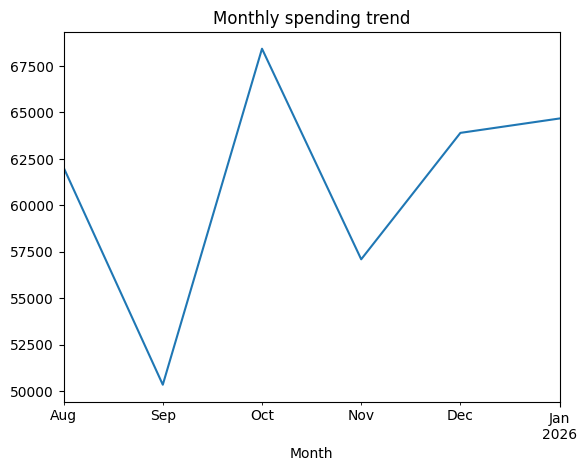

In [96]:
#Monthly Spending Trend
Monthly_summary['Debit'].plot()
plt.title("Monthly spending trend")
plt.show()



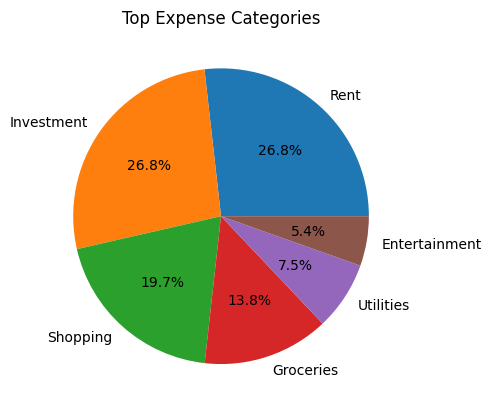

In [97]:
category_spend.head(6).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top Expense Categories")
plt.ylabel("")
plt.show()

🧠 PHASE 4 — Insight Generation (Very Important)

In [98]:
highest_spend_category = category_spend.idxmax()
print(f"⚠ You are spending most on {highest_spend_category}")

⚠ You are spending most on Rent


In [100]:
#Savings rate
total_income = Monthly_summary['Credit'].sum()
total_expense = Monthly_summary['Debit'].sum()

total_savings = total_income - total_expense

In [109]:
savings_rate = (category_spend['Investment'] / total_income) * 100
print(f"Your savings rate is {savings_rate:.2f}%.")
#category_spend

Your savings rate is 33.33%.


In [110]:
if savings_rate < 10:
    print(f"⚠ Your savings rate is {savings_rate:.2f}%. Try reducing expenses.")
elif savings_rate < 20:
    print(f"🙂 Your savings rate is {savings_rate:.2f}%. You are doing okay.")
else:
    print(f"🔥 Excellent! Your savings rate is {savings_rate:.2f}%.")

🔥 Excellent! Your savings rate is 33.33%.
